In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50                               
x_start, x_end = -2.0, 2.0           
y_start, y_end = -1.0, 1.0           
x = numpy.linspace(x_start, x_end, N)   
y = numpy.linspace(y_start, y_end, N)   
X, Y = numpy.meshgrid(x, y) 

In [18]:
gamma = 5.0                      
x_vortex = numpy.array([-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0])
y_vortex = numpy.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) 

In [19]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [20]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
  
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [21]:
u=0
v=0
psi=0
for i in range(9):
    u_inf = get_velocity_vortex(gamma, x_vortex[i], y_vortex[i], X,Y)[0]
    v_inf = get_velocity_vortex(gamma, x_vortex[i], y_vortex[i], X,Y)[1]
    psi_inf=get_stream_function_vortex(gamma, x_vortex[i], y_vortex[i], X,Y)
    
    u=u+u_inf
    v=v+v_inf
    psi=psi+psi_inf

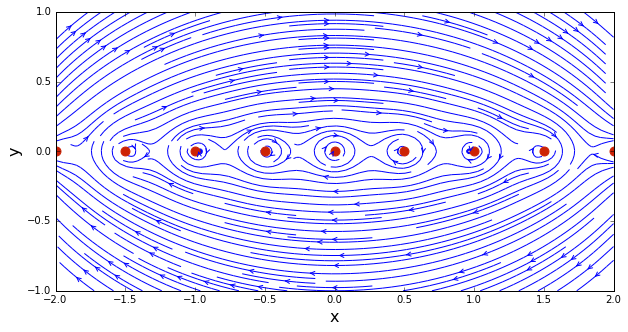

In [22]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');